In [1]:
%load_ext autoreload
%autoreload 2

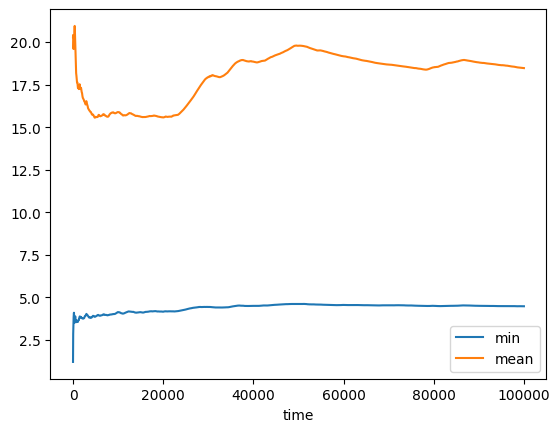

In [26]:
import functools
import jax
import jax.numpy as jnp
import jax_flock as jf
import matplotlib.pyplot as plt
import stats

params = jf.Params(
    weight_forward  = 0.20,
    weight_separate = 1.00,
    weight_align    = 0.30,
    weight_cohere   = 0.60,
    weight_avoid    = 0.80
)

config = jf.Config(
    boid_count = 25,
    sphere_radius = 30.0
)

initial_state = jf.init_state(config, jax.random.PRNGKey(0))
def next_state(state):
    return jf.next_state(params, config, 1/60, state)

def J(state):
    dists = jf.pairwise_distances(state)
    return jnp.hstack([jnp.min(dists), jnp.mean(dists)])

res = stats.time_average_with_history(initial_state, next_state, 100_000, J)
min_sep, mean_sep = res.T

plt.plot(min_sep, label='min')
plt.plot(mean_sep, label='mean')
plt.xlabel('time')
plt.legend()

How does the history compare starting from different states?

In [8]:
state = stats.advance(initial_state, next_state, 500_000)

500k-600k

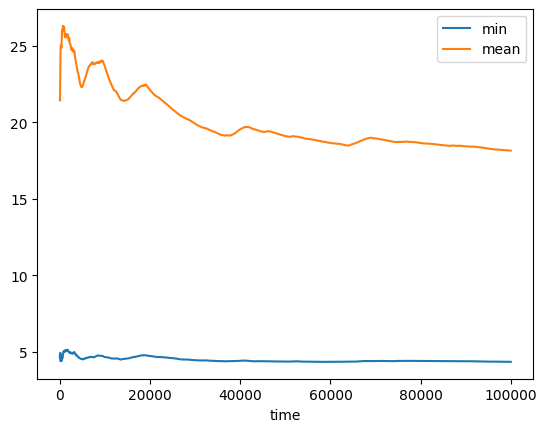

In [9]:
res = stats.time_average_with_history(state, next_state, 100_000, J)
min_sep, mean_sep = res.T

plt.plot(min_sep, label='min')
plt.plot(mean_sep, label='mean')
plt.xlabel('time')
plt.legend()

600k-700k

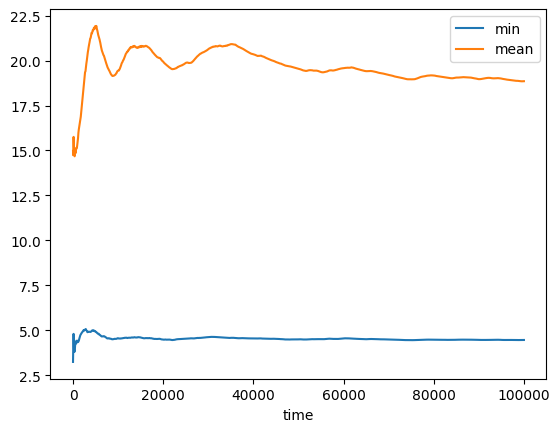

In [28]:
res = stats.time_average_with_history(stats.advance(state, next_state, 100_000), next_state, 100_000, J)
min_sep, mean_sep = res.T

plt.plot(min_sep, label='min')
plt.plot(mean_sep, label='mean')
plt.xlabel('time')
plt.legend()


700k-800k

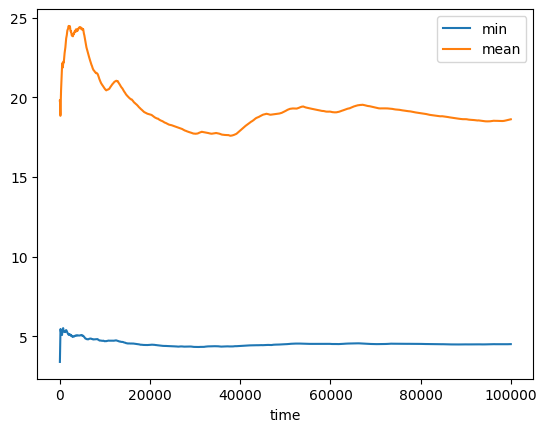

In [29]:
res = stats.time_average_with_history(stats.advance(state, next_state, 200_000), next_state, 100_000, J)
min_sep, mean_sep = res.T

plt.plot(min_sep, label='min')
plt.plot(mean_sep, label='mean')
plt.xlabel('time')
plt.legend()


In [16]:
@functools.partial(jax.jit, static_argnames=['n_steps'])
def time_average(initial_state, n_steps):
    def step(state, _):
        state = next_state(state)
        dists = jf.pairwise_distances(state)
        return state, jnp.hstack([jnp.min(dists), jnp.mean(dists)])
    
    _, J = jax.lax.scan(step, initial_state, None, n_steps)
    return J

min_sep, mean_sep = time_average(state, 100_000).T

plt.hist(min_sep, bins=100, density=True, alpha=0.5, label='min')
plt.hist(mean_sep, bins=100, density=True, alpha=0.5, label='mean')
plt.axvline(jnp.mean(min_sep), color='C0', linestyle='--')
plt.axvline(jnp.mean(mean_sep), color='C0', linestyle='--')
plt.legend()

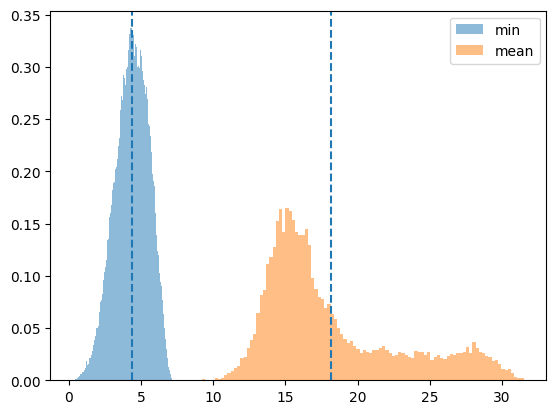

Distribution of min_sep/mean_sep looks the same with different seed

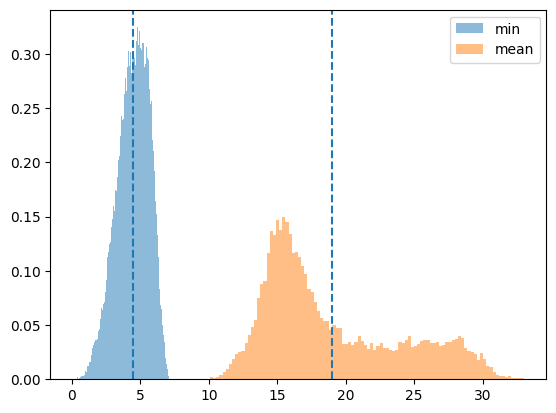

In [25]:
min_sep, mean_sep = time_average(jf.init_state(config, jax.random.PRNGKey(1234)), 100_000).T

plt.hist(min_sep, bins=100, density=True, alpha=0.5, label='min')
plt.hist(mean_sep, bins=100, density=True, alpha=0.5, label='mean')
plt.axvline(jnp.mean(min_sep), color='C0', linestyle='--')
plt.axvline(jnp.mean(mean_sep), color='C0', linestyle='--')
plt.legend()

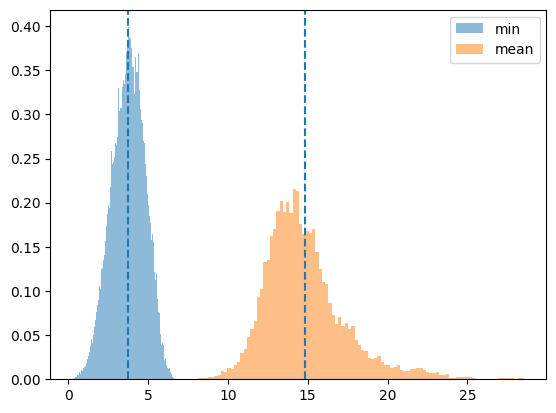

In [31]:
params = params.replace(weight_separate=0.90)

def next_state(state):
    return jf.next_state(params, config, 1/60, state)

@functools.partial(jax.jit, static_argnames=['n_steps'])
def time_average(initial_state, n_steps):
    def step(state, _):
        state = next_state(state)
        dists = jf.pairwise_distances(state)
        return state, jnp.hstack([jnp.min(dists), jnp.mean(dists)])
    
    _, J = jax.lax.scan(step, initial_state, None, n_steps)
    return J

min_sep, mean_sep = time_average(jf.init_state(config, jax.random.PRNGKey(1234)), 100_000).T

plt.hist(min_sep, bins=100, density=True, alpha=0.5, label='min')
plt.hist(mean_sep, bins=100, density=True, alpha=0.5, label='mean')
plt.axvline(jnp.mean(min_sep), color='C0', linestyle='--')
plt.axvline(jnp.mean(mean_sep), color='C0', linestyle='--')
plt.legend()

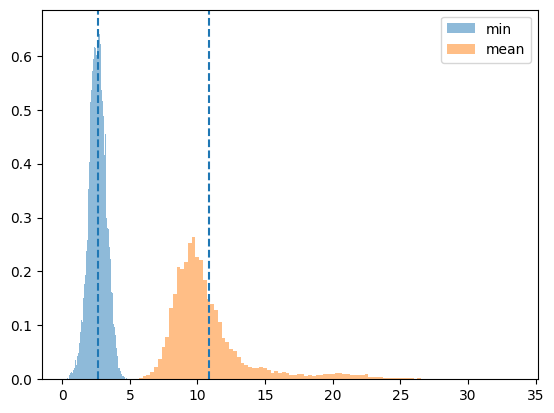

In [30]:
params = params.replace(weight_separate=0.80)

def next_state(state):
    return jf.next_state(params, config, 1/60, state)

@functools.partial(jax.jit, static_argnames=['n_steps'])
def time_average(initial_state, n_steps):
    def step(state, _):
        state = next_state(state)
        dists = jf.pairwise_distances(state)
        return state, jnp.hstack([jnp.min(dists), jnp.mean(dists)])
    
    _, J = jax.lax.scan(step, initial_state, None, n_steps)
    return J

min_sep, mean_sep = time_average(jf.init_state(config, jax.random.PRNGKey(1234)), 100_000).T

plt.hist(min_sep, bins=100, density=True, alpha=0.5, label='min')
plt.hist(mean_sep, bins=100, density=True, alpha=0.5, label='mean')
plt.axvline(jnp.mean(min_sep), color='C0', linestyle='--')
plt.axvline(jnp.mean(mean_sep), color='C0', linestyle='--')
plt.legend()
